In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [50]:
sms = pd.read_csv("/content/spam.csv", encoding='latin-1')
sms

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [51]:
sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
sms.dropna(inplace=True)
sms.columns = ['mark','message']
sms

,mark,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [52]:
sms.describe()

,mark,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [53]:
sms.groupby('mark').describe()

message                                                               
       count unique                                                top freq
mark                                                                       
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

In [54]:
sms['mark_num'] = sms.mark.map({'ham':0,'spam':1})
sms

,mark,message,mark_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [55]:
sms['message_len'] = sms.message.str.len()
sms

,mark,message,mark_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


Text(0.5, 0, 'Message Length')

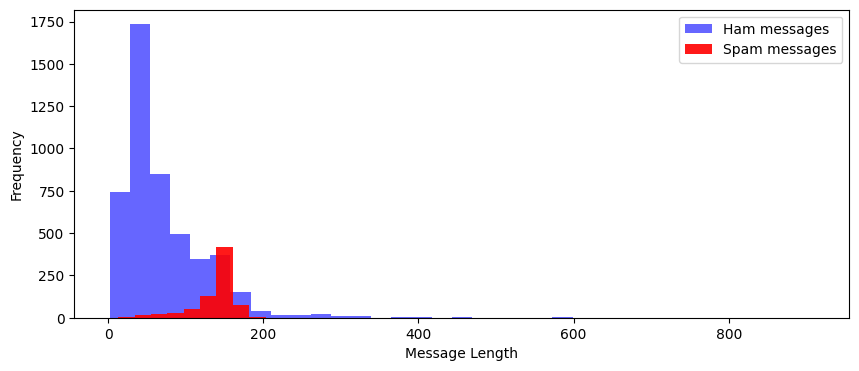

In [56]:
plt.figure(figsize=(10, 4))

sms[sms.mark=='ham'].message_len.plot(bins=35, kind='hist', color='blue',
                                       label='Ham messages', alpha=0.6)
sms[sms.mark=='spam'].message_len.plot(kind='hist', color='red',
                                       label='Spam messages', alpha=0.9)
plt.legend()
plt.xlabel("Message Length")

In [57]:
sms[sms.mark=='ham'].describe()

,mark_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [58]:
sms[sms.mark=='spam'].describe()

,mark_num,message_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [59]:
# lets check largest spam and ham message
sms[sms.message_len == 910].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [60]:
sms[sms.message_len == 224].message.iloc[1]   #longest spam message

'Hi, this is Mandy Sullivan calling from HOTMIX FM...you are chosen to receive å£5000.00 in our Easter Prize draw.....Please telephone 09041940223 to claim before 29/03/05 or your prize will be transferred to someone else....'

# 📑 Text Pre-processing 📑


In [61]:
!python -m nltk.downloader stopwords

import string
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
!python -m nltk.downloader averaged_perceptron_tagger

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [63]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [64]:
# return the wordnet object value corresponding to the POS tag

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [65]:
def clean_text(text):
    text = text.lower()  # Lowercase the text
    text = [word.strip(string.punctuation) for word in text.split(" ")]  # Tokenize text and remove punctuation
    text = [word for word in text if not any(c.isdigit() for c in word)]  # Remove words that contain numbers
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]  # Remove stop words
    text = [t for t in text if len(t) > 0]  # Remove empty tokens
    pos_tags = pos_tag(text)  # POS tag text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]  # Lemmatize text
    text = [t for t in text if len(t) > 1]  # Remove words with only one letter
    text = " ".join(text)  # Join all
    return text

# Clean text data
sms["cleaned_message"] = sms["message"].apply(lambda x: clean_text(x))

In [66]:
sms

,mark,message,mark_num,message_len,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazy available bugis great wo...
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry wkly comp win fa cup final tkts may...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah think go usf life around though
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,time try contact pound prize claim easy call p...
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,go esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,pity mood so...any suggestion
5570,ham,The guy did some bitching but I acted like i'd...,0,125,guy bitch act like i'd interested buying somet...


In [67]:
from collections import Counter

In [68]:
words = sms[sms.mark=='ham'].cleaned_message.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)

ham_words.most_common(50)

[('get', 591),
 ('go', 516),
 ("i'm", 372),
 ('come', 317),
 ('call', 287),
 ('lt;#&gt', 276),
 ('ok', 272),
 ('know', 254),
 ('ur', 240),
 ('like', 238),
 ('good', 232),
 ('say', 224),
 ('time', 216),
 ('love', 215),
 ('day', 214),
 ('want', 206),
 ('think', 183),
 ('tell', 181),
 ('need', 175),
 ('one', 169),
 ("i'll", 167),
 ('send', 167),
 ('see', 163),
 ('take', 162),
 ('make', 162),
 ('home', 160),
 ('lor', 160),
 ('sorry', 153),
 ('still', 146),
 ('well', 139),
 ('later', 134),
 ('da', 131),
 ('work', 130),
 ('back', 129),
 ('today', 128),
 ('dont', 128),
 ('ask', 124),
 ('hi', 117),
 ('give', 116),
 ('miss', 115),
 ('much', 112),
 ('oh', 111),
 ('thing', 111),
 ('night', 110),
 ('leave', 108),
 ('happy', 106),
 ('hey', 106),
 ('great', 102),
 ('hope', 101),
 ('way', 100)]

In [69]:
words = sms[sms.mark=='spam'].cleaned_message.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)

spam_words.most_common(50)

[('call', 365),
 ('free', 216),
 ('txt', 150),
 ('ur', 144),
 ('text', 136),
 ('mobile', 135),
 ('claim', 115),
 ('stop', 113),
 ('reply', 109),
 ('prize', 94),
 ('get', 94),
 ('send', 79),
 ('tone', 73),
 ('new', 72),
 ('service', 72),
 ('award', 66),
 ('nokia', 65),
 ('urgent', 63),
 ('win', 62),
 ('cash', 62),
 ('contact', 61),
 ('week', 58),
 ('phone', 57),
 ('please', 52),
 ('customer', 51),
 ('per', 46),
 ('message', 45),
 ('chat', 44),
 ('min', 44),
 ('guarantee', 41),
 ('draw', 39),
 ('number', 39),
 ('try', 38),
 ('receive', 37),
 ('late', 37),
 ('offer', 37),
 ('line', 37),
 ('voucher', 36),
 ('show', 35),
 ('go', 35),
 ('landline', 34),
 ('camera', 33),
 ('msg', 33),
 ('today', 33),
 ('every', 33),
 ('holiday', 32),
 ('want', 31),
 ('video', 30),
 ('box', 30),
 ('apply', 29)]

In [70]:
from sklearn.model_selection import train_test_split

x = sms.cleaned_message
y = sms.mark_num
print(x.shape)
print(y.shape)

(5572,)
(5572,)


In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


In [72]:
from sklearn.feature_extraction.text import CountVectorizer


vect = CountVectorizer()

x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)

print(type(x_train_dtm), x_train_dtm.shape)
print(type(x_test_dtm), x_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (4179, 5687)
<class 'scipy.sparse._csr.csr_matrix'> (1393, 5687)


Training Data: fit_transform is used to learn the vocabulary and transform the training data.

Testing Data: transform is used to apply the learned vocabulary to the test data, ensuring consistency.

This approach ensures that both the training and testing data are represented in the same feature space, which is essential for accurate and reliable model evaluation.

In [73]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit_transform(x_train_dtm)


<4179x5687 sparse matrix of type '<class 'numpy.float64'>'
	with 33535 stored elements in Compressed Sparse Row format>

# Model Building

In [74]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

nb.fit(x_train_dtm, y_train)

MultinomialNB()

In [75]:
from sklearn import metrics

# make class predictions for X_test_dtm
y_pred_class = nb.predict(x_test_dtm)

# calculate accuracy of class predictions
print("<><><><><><><Accuracy Score><><><><><><>")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("<><><><><><><Confision Matrix><><><><><><>")
metrics.confusion_matrix(y_test, y_pred_class)

<><><><><><><Accuracy Score><><><><><><>
0.9806173725771715
<><><><><><><Confision Matrix><><><><><><>


array([[1201,   12],
       [  15,  165]])

TP = 1201  
TN = 165  
FP = 12  
FN = 15

Data seems quite imbalanced


#Up sampling the spam messages

In [76]:
sms

,mark,message,mark_num,message_len,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazy available bugis great wo...
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry wkly comp win fa cup final tkts may...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah think go usf life around though
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,time try contact pound prize claim easy call p...
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,go esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,pity mood so...any suggestion
5570,ham,The guy did some bitching but I acted like i'd...,0,125,guy bitch act like i'd interested buying somet...


In [77]:
from sklearn.utils import resample

spam = sms[sms.mark=='spam']
ham = sms[sms.mark=='ham']

spam_upsampled = resample(spam, replace=True,  # minority part
                          n_samples=len(ham),   # matching size of mejority part
                          random_state=42)

# add upsampled part
sms_upsampled = pd.concat([ham, spam_upsampled])

# shuffle the dataset
sms_upsampled = sms_upsampled.sample(frac =1, random_state=42).reset_index(drop=True)



In [78]:
sms_upsampled

,mark,message,mark_num,message_len,cleaned_message
0,ham,Mm yes dear look how i am hugging you both. :-P,0,47,mm yes dear look hug
1,ham,But pls dont play in others life.,0,33,pls dont play others life
2,ham,i can call in &lt;#&gt; min if thats ok,0,41,call lt;#&gt min thats ok
3,ham,HMM yeah if your not too grooved out! And im l...,0,83,hmm yeah groove im look forward pound special
4,spam,"Latest News! Police station toilet stolen, cop...",1,70,late news police station toilet steal cop noth...
...,...,...,...,...,...
9645,spam,"SMS SERVICES. for your inclusive text credits,...",1,158,sm service inclusive text credit pls goto www....
9646,spam,"Loan for any purpose å£500 - å£75,000. Homeown...",1,164,loan purpose homeowner tenant welcome previous...
9647,spam,"If you don't, your prize will go to another cu...",1,144,prize go another customer t&c www.t-c.biz polo...
9648,ham,"Ya, told..she was asking wats matter?",0,37,ya told..she ask wats matter


In [79]:
sms_upsampled.mark.value_counts()

mark
ham     4825
spam    4825
Name: count, dtype: int64

here we get balanced data for spam and ham messages

In [80]:
x = sms_upsampled.cleaned_message
y = sms_upsampled.mark_num
print(x.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9650,)
(9650,)
(7237,)
(2413,)
(7237,)
(2413,)


In [81]:
# Convert text data into numerical features using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

In [82]:
print(type(x_train_tfidf), x_train_tfidf.shape)
print(type(x_test_tfidf), x_test_tfidf.shape)

<class 'scipy.sparse._csr.csr_matrix'> (7237, 5000)
<class 'scipy.sparse._csr.csr_matrix'> (2413, 5000)


In [84]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

nb.fit(x_train_tfidf, y_train)

from sklearn import metrics

# make class predictions for X_test_dtm
y_pred_class = nb.predict(x_test_tfidf)

# calculate accuracy of class predictions
print("<><><><><><><Accuracy Score><><><><><><>")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("<><><><><><><Confision Matrix><><><><><><>")
metrics.confusion_matrix(y_test, y_pred_class)

<><><><><><><Accuracy Score><><><><><><>
0.9780356402818069
<><><><><><><Confision Matrix><><><><><><>


array([[1168,   27],
       [  26, 1192]])

# 2nd model Support Vector Machine

In [85]:
from sklearn.svm import SVC

In [86]:
# Train an SVM model
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(x_train_tfidf, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [87]:
# Make predictions
y_pred = svm_model.predict(x_test_tfidf)

In [88]:
# calculate accuracy of class predictions
print("<><><><><><><Accuracy Score><><><><><><>")
print(metrics.accuracy_score(y_test, y_pred))

# print the confusion matrix
print("<><><><><><><Confision Matrix><><><><><><>")
metrics.confusion_matrix(y_test, y_pred)

<><><><><><><Accuracy Score><><><><><><>
0.9950269374222959
<><><><><><><Confision Matrix><><><><><><>


array([[1191,    4],
       [   8, 1210]])

# SVM gives 99% accuracy

In [89]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC AUC score
y_proba = svm_model.decision_function(x_test_tfidf)  # Use decision_function for SVM
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1195
           1       1.00      0.99      1.00      1218

    accuracy                           1.00      2413
   macro avg       1.00      1.00      1.00      2413
weighted avg       1.00      1.00      1.00      2413

Confusion Matrix:
 [[1191    4]
 [   8 1210]]
ROC AUC Score: 0.9985647642407127


# Saving to pipe line

In [90]:
import joblib

# Save the SVM model
joblib.dump(svm_model, 'svm_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [91]:
from sklearn.pipeline import Pipeline

# Create a pipeline
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('svm', svm_model)
])

# Save the pipeline
joblib.dump(pipeline, 'text_classification_pipeline.pkl')


['text_classification_pipeline.pkl']

# Check your message is spam or ham

In [102]:
# load the pipeline
pipeline = joblib.load('text_classification_pipeline.pkl')

input_message = str(input('Message : '))

predictions = pipeline.predict([input_message])

# Output the prediction
for message, label in zip(input_message, predictions):
    print(f"Message: {message} -> Label: {'Spam' if predictions == 1 else 'Ham'}")

Message : hi
Message: h -> Label: Ham
